## Issues with pystan
Some mac users may experience problems importing or running `pystan` - One option is to use `cmdstanpy` instead.
* To install, follow the step described [here](https://mc-stan.org/cmdstanpy/installation.html)
    - Make sure you create a new virtual environment to install cmdstanpy
    - If you want to work in Jupyter notebook, you may want to make the new ennvironment (that you installed cmdstanpy) to appear there.
        1. Install `nb_conda_kernels` to the base environment 
        2. Activate the new environemnt and install `ipykernel`. 
        3. Open the jupyter notebook (for stan exercises) and click Kernel -> Change Kernel. You can now see the new environment added there.


* You may need to install some of the packages (such as sklearn, matplotlib) to the new environemnt
* This is optional, but if you want to see the progress of MCMC sampling, you can install `ipywidgets` (in the new environment) and run the following
```
!jupyter nbextension enable --py widgetsnbextension
```

In [1]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
from cmdstanpy import CmdStanModel

In [3]:
import math
import pandas as pd
import numpy as np
import random
#import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import geocoord_conversion_f as fl #ll_to_os()

In [5]:
os.chdir('/Users/sahoko/GitHub/Food-insecurity-GP-forecasting/')
country_list = os.listdir('Data/Fioni2023/output_data')
country_list.remove('.DS_Store')
country_list

['Syria', 'Burkina-Faso', 'Yemen', 'Mali', 'Nigeria', 'Niger', 'Cameroon']

In [6]:
# Choose country from country_list ['Syria', 'Burkina-Faso', 'Yemen', 'Mali', 'Nigeria', 'Niger', 'Cameroon']
country = 'Burkina-Faso'

In [10]:
# Read data
file = 'Data/Foini2023/output_data/'+ country +'/' + country +'-location.csv'
df_loc = pd.read_csv(file)
file = 'Data/Foini2023/output_data/'+ country +'/' + country +'-long.csv'
df_long = pd.read_csv(file)

In [45]:
region_list = list(df_loc['region'])
region_list

['Boucle-Du-Mouhoun',
 'Cascades',
 'Centre',
 'Centre-Est',
 'Centre-Nord',
 'Centre-Ouest',
 'Centre-Sud',
 'Est',
 'Hauts-Bassins',
 'Nord',
 'Plateau-Central',
 'Sahel',
 'Sud-Ouest']

In [23]:
n_row = len(df_long)
n_region = len(df_loc)
n_timepoint = int(n_row/n_region)

In [13]:
y = df_long['FCG']
z = np.log(y/(100-y))

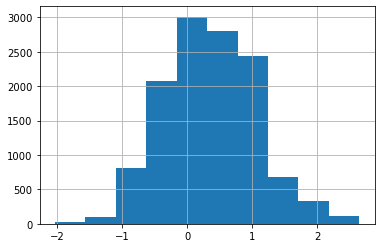

In [14]:
z.hist();

In [32]:
time = np.array(range(n_timepoint))
loc = np.array(df_loc[['Easting','Northing']])

In [38]:
random.seed(872) 
n_tp_tes = int(round(n_timepoint*0.3,0))
n_tp_tr = n_timepoint - n_tp_tes
random_indices = random.sample(range(n_timepoint), n_tp_tes)
random_indices.sort()

In [39]:
time_tr= time[~np.in1d(np.arange(time.size),random_indices)]
time_tes = time[random_indices]

In [40]:
Z = np.array(z).reshape(n_timepoint, n_region, order='F')

In [41]:
Z_tr = Z[time_tr,:]
Z_tes = Z[time_tes, :]

In [42]:
z_tr = Z_tr.reshape(n_tp_tr*n_region, order='F')
z_tes = Z_tes.reshape(n_tp_tes*n_region, order='F')

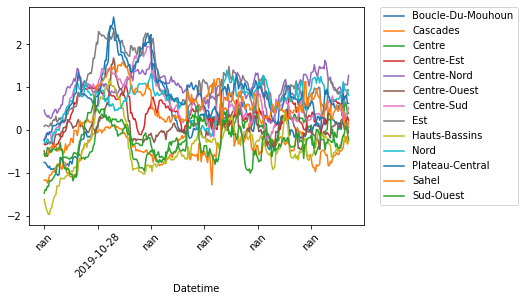

In [46]:
df_tes = pd.DataFrame(Z_tes, columns = region_list)
df_tes['Datetime'] = df_long['Datetime'].iloc[time_tes]
df_tes.set_index('Datetime').plot.line()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

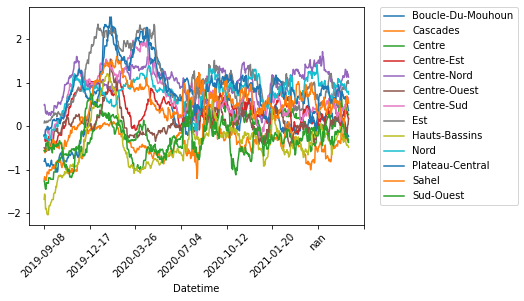

In [48]:
df_tr = pd.DataFrame(Z_tr, columns = region_list)
df_tr['Datetime'] = df_long['Datetime'].iloc[time_tr]
df_tr.set_index('Datetime').plot.line()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

In [53]:
X1_tr = loc
X2_tr = np.reshape(np.array(time_tr), (n_tp_tr, 1))
N1 = n_region
N2 = n_tp_tr
Hurst = [0.5, 0.5]
stan_data = {"N1": N1,"N2": N2, "X1": X1_tr, "X2": X2_tr, "y": z_tr, "Hurst1": Hurst[0], "Hurst2":Hurst[1]}

Two stage to fit the model
1. compile the stan file using `CmdStanModel`
2. then `.sample()` does the sampling

You don't have to re-compile the file unless you changed the `.stan` file. 

See (https://cmdstanpy.readthedocs.io/en/stable-0.9.65/sample.html) for more options

In [ ]:
## Causing an error with cmdstanpy...
model = CmdStanModel(stan_file='Code/Stan/GPst_est_sqcenfBM.stan')

In [ ]:
fit = model.sample(data=stan_data, chains=2, seed=1, iter_warmup=200, iter_sampling=300)